In [ ]:
#*****************************************************************
#If you have any questions please use Q&A section on www.udemy.com
#Author - jaro.algo@icloud.com
#*****************************************************************

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import datetime
import os
import matplotlib.style
from pandas.core.common import flatten
from functools import partial, reduce

In [2]:
plt.style.use('ggplot')

In [3]:
path = '/Users/testing/Documents/Udemy/Strategy 2 - Short term breakout with RSI'

In [4]:
pairs_list = []
for filename in os.listdir(path):
    if filename.endswith('.csv'):
        pairs_list.append(filename.split('.')[0])
print(pairs_list)

df = {}
for pair in range(len(pairs_list)):
    df[pair] = pd.read_csv(pairs_list[pair]+'.csv', header = 0)
    df[pair].columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
    df[pair]['Date'] = df[pair]['Date'].str.split(' ').str[0:2]
    df[pair]['Date'] = df[pair]['Date'].str.join(' ')
    df[pair].set_index('Date', inplace = True)
    df[pair].index = pd.to_datetime(df[pair].index, format = '%d.%m.%Y %H:%M:%S.%f')

['EURUSD', 'USDCHF', 'USDJPY', 'USDCAD', 'NZDUSD', 'GBPUSD', 'AUDUSD']


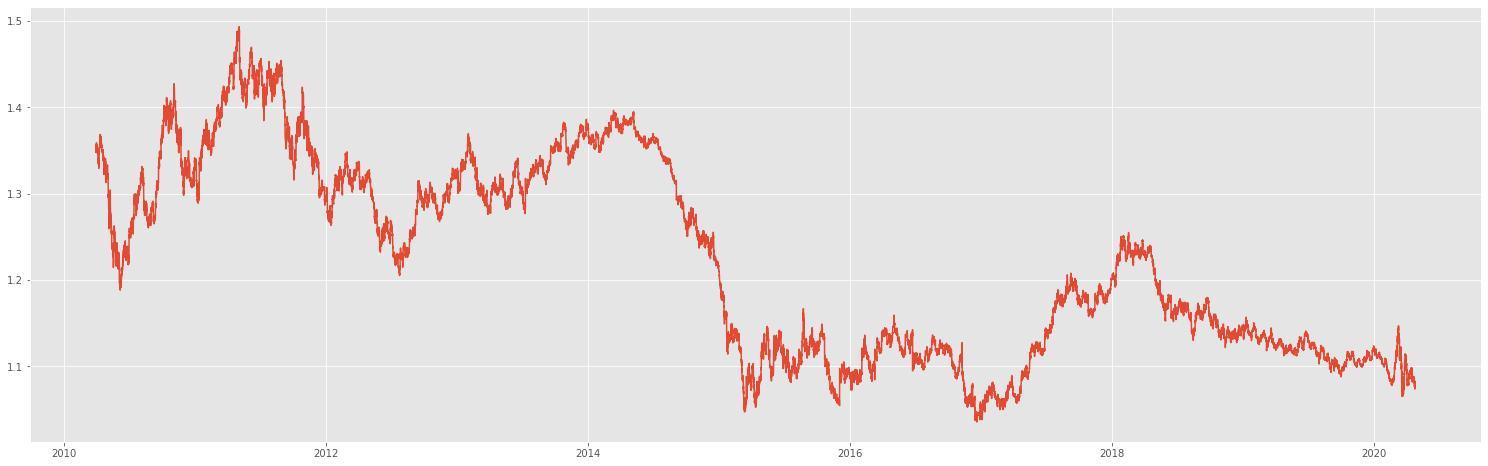

In [5]:
plt.figure(figsize = (26, 8))
plt.plot(df[0]['Close'])

In [6]:
def rsi(df, n):
    df['diff'] = df['Close'].diff(1).dropna()
    df['gains'] = np.where(df['diff'] > 0, df['diff'], np.nan)
    df['losses'] = np.where(df['diff'] <= 0, df['diff'], np.nan)
    df['average_gains'] = df['gains'].rolling(n, min_periods = 1).mean()
    df['average_losses'] = df['losses'].rolling(n, min_periods = 1).mean()
    rs = abs(df['average_gains'] / df['average_losses'])
    df['RSI'] = 100 - (100 / (1 + rs))
    df = df.drop(['diff', 'gains', 'losses', 'average_gains', 'average_losses'], axis = 1)
    return df

def ATR(df, n):
    df = df.copy()
    df['High-Low'] = abs(df['High'] - df['Low'])
    df['High-PrevClose'] = abs(df['High'] - df['Close'].shift(1))
    df['Low-PrevClose'] = abs(df['Low'] - df['Close'].shift(1))
    df['TR'] = df[['High-Low', 'High-PrevClose', 'Low-PrevClose']].max(axis = 1, skipna = False)
    df['ATR'] = df['TR'].rolling(n).mean()
    df = df.drop(['High-Low', 'High-PrevClose', 'Low-PrevClose'], axis = 1)
    return df

In [9]:
#Strategy parameters
account_size = 10000
slippage = 2
size = 1
ATR_SL = 0.5

for pair in range(len(pairs_list)):
    df[pair]['ATR'] = ATR(df[pair], 20)['ATR']
    df[pair]['RSI'] = rsi(df[pair], 14)['RSI']
    df[pair]['average_close'] = df[pair]['Close'].rolling(5).mean()
    if 'JPY' not in pairs_list[pair]:
        df[pair]['spread'] = float(slippage) / float(10000)
        df[pair]['size'] = float(size) * float(10000)
        print('Pair: ', pairs_list[pair], 'a')
    else:
        df[pair]['spread'] = float(slippage) / float(100)
        df[pair]['size'] = float(size) * float(100)
        print('Pair: ', pairs_list[pair], 'b')

Pair:  EURUSD a
Pair:  USDCHF a
Pair:  USDJPY b
Pair:  USDCAD a
Pair:  NZDUSD a
Pair:  GBPUSD a
Pair:  AUDUSD a


In [8]:
df[0]

,Open,High,Low,Close,Volume,ATR,diff,gains,losses,average_gains,average_losses,RSI,spread,size
Date,,,,,,,,,,,,,,
2010-04-01 00:00:00,1.35060,1.35277,1.35046,1.35265,1598.4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0002,10000.0
2010-04-01 01:00:00,1.35263,1.35612,1.35221,1.35297,2322.6001,NaN,0.00032,0.00032,NaN,0.000320,NaN,NaN,0.0002,10000.0
2010-04-01 02:00:00,1.35305,1.35314,1.35050,1.35070,1975.0000,NaN,-0.00227,NaN,-0.00227,0.000320,-0.002270,12.355212,0.0002,10000.0
2010-04-01 03:00:00,1.35062,1.35104,1.34955,1.35002,2520.8999,NaN,-0.00068,NaN,-0.00068,0.000320,-0.001475,17.827298,0.0002,10000.0
2010-04-01 04:00:00,1.34986,1.35140,1.34973,1.35075,3416.6001,NaN,0.00073,0.00073,NaN,0.000525,-0.001475,26.250000,0.0002,10000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-24 17:00:00,1.07974,1.08025,1.07866,1.07885,12209.4300,0.001729,-0.00087,NaN,-0.00087,0.001024,-0.001083,48.586118,0.0002,10000.0
2020-04-24 18:00:00,1.07885,1.07953,1.07847,1.07943,7231.2800,0.001730,0.00058,0.00058,NaN,0.000974,-0.001296,42.918665,0.0002,10000.0
2020-04-24 19:00:00,1.07943,1.08011,1.07908,1.07979,7819.2300,0.001766,0.00036,0.00036,NaN,0.001011,-0.001296,43.825852,0.0002,10000.0


In [10]:
open_trade = {}
trade = {}
long_take_profit = {}
short_take_profit = {}
long_stop_loss = {}
short_stop_loss = {}
long_entry_price = {}
short_entry_price = {}

for pair in range(len(pairs_list)):
    open_trade[pair] = []
    trade[pair] = {}
    long_take_profit[pair] = []
    short_take_profit[pair] = []
    long_stop_loss[pair] = []
    short_stop_loss[pair] = []
    long_entry_price[pair] = []
    short_entry_price[pair] = []
    
    for i in range(50, len(df[pair])):
        #Buy
        if df[pair]['RSI'][i-1] < 20 and df[pair]['Close'][i - 1] < df[pair]['average_close'][i - 1] and df[pair]['Close'][i] >= df[pair]['average_close'][i] \
            and len(open_trade[pair]) == 0:
            print(i, 'New Long trade at price:', round(df[pair]['Close'][i], 4), ' On day:', df[pair].index[i], 'Pair:', pairs_list[pair])
            trade[pair][i] = {'ID': i,
                             'date_of_trade': df[pair].index[i],
                             'entry_price': df[pair]['Close'][i],
                             'signal': 'Buy',
                             'result': 0, 
                             'TP': df[pair]['Close'][i] + df[pair]['ATR'][i] * ATR_SL,
                             'SL': df[pair]['Close'][i] - df[pair]['ATR'][i] * ATR_SL}
            open_trade[pair].append(i)
            long_take_profit[pair].append(trade[pair][i]['TP'])
            long_stop_loss[pair].append(trade[pair][i]['SL'])
            long_entry_price[pair].append(trade[pair][i]['entry_price'])
        
        #Sell
        if df[pair]['RSI'][i-1] > 80 and df[pair]['Close'][i - 1] > df[pair]['average_close'][i - 1] and df[pair]['Close'][i] <= df[pair]['average_close'][i] \
            and len(open_trade[pair]) == 0:
            print(i, 'New Short trade at price:', round(df[pair]['Close'][i], 4), ' On day:', df[pair].index[i], 'Pair:', pairs_list[pair])
            trade[pair][i] = {'ID': i,
                             'date_of_trade': df[pair].index[i],
                             'entry_price': df[pair]['Close'][i],
                             'signal': 'Sell',
                             'result': 0, 
                             'TP': df[pair]['Close'][i] - df[pair]['ATR'][i] * ATR_SL,
                             'SL': df[pair]['Close'][i] + df[pair]['ATR'][i] * ATR_SL}
            open_trade[pair].append(i)
            short_take_profit[pair].append(trade[pair][i]['TP'])
            short_stop_loss[pair].append(trade[pair][i]['SL'])
            short_entry_price[pair].append(trade[pair][i]['entry_price'])
            
        #Exit trades---------------------------------------------------------------------------
        #Buy profit
        if any(y <= df[pair]['Close'][i] for y in long_take_profit[pair]):
            for j in open_trade[pair]:
                if trade[pair][j].get('result', {}) == 0 and trade[pair][j].get('signal', {}) == 'Buy':
                    if df[pair]['Close'][i] >= trade[pair][j]['TP']:
                        trade[pair][j].update({'result' : (trade[pair][j]['TP'] - trade[pair][j]['entry_price'] - df[pair]['spread'][i]) * df[pair]['size'][i]})
                        print(j, 
                             'Long profit at price:', round(df[pair]['Close'][i], 4),
                             'On day:', df[pair].index[i],
                             'With profit:', round(trade[pair][j]['result'], 4), '\n')
                        open_trade[pair].remove(j)
                        long_take_profit[pair].remove(trade[pair][j]['TP'])
                        long_stop_loss[pair].remove(trade[pair][j]['SL'])
        #Buy loss
        if any(y >= df[pair]['Close'][i] for y in long_stop_loss[pair]):
            for j in open_trade[pair]:
                if trade[pair][j].get('result', {}) == 0 and trade[pair][j].get('signal', {}) == 'Buy':
                    if df[pair]['Close'][i] <= trade[pair][j]['SL']:
                        trade[pair][j].update({'result' : (trade[pair][j]['SL'] - trade[pair][j]['entry_price'] - df[pair]['spread'][i]) * df[pair]['size'][i]})
                        print(j, 
                             'Long loss at price:', round(df[pair]['Close'][i], 4),
                             'On day:', df[pair].index[i],
                             'With loss:', round(trade[pair][j]['result'], 4), '\n')
                        open_trade[pair].remove(j)
                        long_take_profit[pair].remove(trade[pair][j]['TP'])
                        long_stop_loss[pair].remove(trade[pair][j]['SL'])
                        
        #Sell profit
        if any(y >= df[pair]['Close'][i] for y in short_take_profit[pair]):
            for j in open_trade[pair]:
                if trade[pair][j].get('result', {}) == 0 and trade[pair][j].get('signal', {}) == 'Sell':
                    if df[pair]['Close'][i] <= trade[pair][j]['TP']:
                        trade[pair][j].update({'result' : (trade[pair][j]['entry_price'] - trade[pair][j]['TP'] - df[pair]['spread'][i]) * df[pair]['size'][i]})
                        print(j, 
                             'Short profit at price:', round(df[pair]['Close'][i], 4),
                             'On day:', df[pair].index[i],
                             'With profit:', round(trade[pair][j]['result'], 4), '\n')
                        open_trade[pair].remove(j)
                        short_take_profit[pair].remove(trade[pair][j]['TP'])
                        short_stop_loss[pair].remove(trade[pair][j]['SL'])
        #Sell loss
        if any(y <= df[pair]['Close'][i] for y in short_stop_loss[pair]):
            for j in open_trade[pair]:
                if trade[pair][j].get('result', {}) == 0 and trade[pair][j].get('signal', {}) == 'Sell':
                    if df[pair]['Close'][i] >= trade[pair][j]['SL']:
                        trade[pair][j].update({'result' : (trade[pair][j]['entry_price'] - trade[pair][j]['SL'] - df[pair]['spread'][i]) * df[pair]['size'][i]})
                        print(j, 
                             'Short loss at price:', round(df[pair]['Close'][i], 4),
                             'On day:', df[pair].index[i],
                             'With loss:', round(trade[pair][j]['result'], 4), '\n')
                        open_trade[pair].remove(j)
                        short_take_profit[pair].remove(trade[pair][j]['TP'])
                        short_stop_loss[pair].remove(trade[pair][j]['SL'])
        #Exit after time
        if len(open_trade[pair]) != 0:
            for j in open_trade[pair]:
                if (i - trade[pair][j]['ID']) >= 12 and trade[pair][j].get('result', {}) == 0 and trade[pair][j].get('signal', {}) == 'Buy':
                    trade[pair][j].update({'result' : (df[pair]['Close'][i] - trade[pair][j]['entry_price'] - df[pair]['spread'][i]) * df[pair]['size'][i]})
                    print(j, 
                         'Long exited after 12 hours:', round(df[pair]['Close'][i], 4),
                         'On day:', df[pair].index[i],
                         'With profit:', round(trade[pair][j]['result'], 4), '\n')
                    open_trade[pair].remove(j)
                    long_take_profit[pair].remove(trade[pair][j]['TP'])
                    long_stop_loss[pair].remove(trade[pair][j]['SL'])
                elif (i - trade[pair][j]['ID']) >= 12 and trade[pair][j].get('result', {}) == 0 and trade[pair][j].get('signal', {}) == 'Sell':
                    trade[pair][j].update({'result' : (trade[pair][j]['entry_price'] - df[pair]['Close'][i] - df[pair]['spread'][i]) * df[pair]['size'][i]})
                    print(j, 
                         'Short exited after 12 hours:', round(df[pair]['Close'][i], 4),
                         'On day:', df[pair].index[i],
                         'With profit:', round(trade[pair][j]['result'], 4), '\n')
                    open_trade[pair].remove(j)
                    short_take_profit[pair].remove(trade[pair][j]['TP'])
                    short_stop_loss[pair].remove(trade[pair][j]['SL'])

960 New Long trade at price: 1.2182  On day: 2010-05-27 00:00:00 Pair: EURUSD
960 Long profit at price: 1.2215 On day: 2010-05-27 03:00:00 With profit: 16.31 

1817 New Short trade at price: 1.2878  On day: 2010-07-15 17:00:00 Pair: EURUSD
1817 Short loss at price: 1.2895 On day: 2010-07-15 19:00:00 With loss: -16.9125 

1887 New Long trade at price: 1.2883  On day: 2010-07-20 15:00:00 Pair: EURUSD
1887 Long profit at price: 1.2904 On day: 2010-07-20 16:00:00 With profit: 13.75 

2719 New Long trade at price: 1.2807  On day: 2010-09-07 07:00:00 Pair: EURUSD
2719 Long loss at price: 1.2793 On day: 2010-09-07 08:00:00 With loss: -12.4425 

2725 New Long trade at price: 1.2757  On day: 2010-09-07 13:00:00 Pair: EURUSD
2725 Long loss at price: 1.2724 On day: 2010-09-07 15:00:00 With loss: -14.055 

2914 New Short trade at price: 1.3132  On day: 2010-09-17 10:00:00 Pair: EURUSD
2914 Short profit at price: 1.3093 On day: 2010-09-17 11:00:00 With profit: 9.86 

3047 New Short trade at price: 

19940 New Short trade at price: 1.3245  On day: 2013-06-06 20:00:00 Pair: EURUSD
19940 Short loss at price: 1.3262 On day: 2013-06-07 05:00:00 With loss: -15.3375 

19998 New Short trade at price: 1.3264  On day: 2013-06-11 06:00:00 Pair: EURUSD
19998 Short loss at price: 1.3281 On day: 2013-06-11 09:00:00 With loss: -10.585 

20447 New Long trade at price: 1.2828  On day: 2013-07-07 23:00:00 Pair: EURUSD
20447 Long loss at price: 1.2813 On day: 2013-07-08 00:00:00 With loss: -10.8375 

20449 New Long trade at price: 1.2826  On day: 2013-07-08 01:00:00 Pair: EURUSD
20449 Long loss at price: 1.2813 On day: 2013-07-08 05:00:00 With loss: -11.3125 

20718 New Short trade at price: 1.3188  On day: 2013-07-23 06:00:00 Pair: EURUSD
20718 Short loss at price: 1.3194 On day: 2013-07-23 08:00:00 With loss: -8.0675 

21226 New Long trade at price: 1.3406  On day: 2013-08-21 10:00:00 Pair: EURUSD
21226 Long loss at price: 1.3389 On day: 2013-08-21 11:00:00 With loss: -7.4275 

21547 New Short tra

32372 New Short trade at price: 1.1145  On day: 2015-06-02 20:00:00 Pair: EURUSD
32372 Short loss at price: 1.1174 On day: 2015-06-03 02:00:00 With loss: -19.335 

32556 New Long trade at price: 1.1205  On day: 2015-06-12 12:00:00 Pair: EURUSD
32556 Long profit at price: 1.1224 On day: 2015-06-12 13:00:00 With profit: 10.075 

32810 New Long trade at price: 1.1006  On day: 2015-06-29 02:00:00 Pair: EURUSD
32810 Long profit at price: 1.1094 On day: 2015-06-29 07:00:00 With profit: 16.69 

33300 New Short trade at price: 1.1067  On day: 2015-07-27 12:00:00 Pair: EURUSD
33300 Short loss at price: 1.1097 On day: 2015-07-27 14:00:00 With loss: -11.3525 

33554 New Short trade at price: 1.0983  On day: 2015-08-11 02:00:00 Pair: EURUSD
33554 Short profit at price: 1.0969 On day: 2015-08-11 06:00:00 With profit: 8.64 

33593 New Short trade at price: 1.1176  On day: 2015-08-12 17:00:00 Pair: EURUSD
33593 Short profit at price: 1.116 On day: 2015-08-12 21:00:00 With profit: 9.04 

34481 New Sho

54165 New Long trade at price: 1.1342  On day: 2018-11-23 21:00:00 Pair: EURUSD
54165 Long loss at price: 1.1335 On day: 2018-11-26 00:00:00 With loss: -9.0625 

54246 New Short trade at price: 1.1381  On day: 2018-11-29 06:00:00 Pair: EURUSD
54246 Short loss at price: 1.139 On day: 2018-11-29 07:00:00 With loss: -10.145 

54519 New Long trade at price: 1.1297  On day: 2018-12-14 15:00:00 Pair: EURUSD
54519 Long profit at price: 1.1307 On day: 2018-12-14 21:00:00 With profit: 4.59 

54696 New Short trade at price: 1.1406  On day: 2018-12-26 00:00:00 Pair: EURUSD
54696 Short loss at price: 1.141 On day: 2018-12-26 01:00:00 With loss: -3.9725 

54700 New Short trade at price: 1.1406  On day: 2018-12-26 04:00:00 Pair: EURUSD
54700 Short profit at price: 1.1403 On day: 2018-12-26 05:00:00 With profit: -0.0 

54821 New Long trade at price: 1.1478  On day: 2019-01-02 05:00:00 Pair: EURUSD
54821 Long profit at price: 1.1486 On day: 2019-01-02 06:00:00 With profit: 0.18 

54824 New Short trade

8918 New Long trade at price: 0.7806  On day: 2011-09-02 14:00:00 Pair: USDCHF
8918 Long profit at price: 0.7829 On day: 2011-09-02 15:00:00 With profit: 13.015 

8975 New Short trade at price: 0.8618  On day: 2011-09-06 23:00:00 Pair: USDCHF
8975 Short profit at price: 0.8575 On day: 2011-09-07 04:00:00 With profit: 28.125 

10915 New Short trade at price: 0.9426  On day: 2011-12-28 19:00:00 Pair: USDCHF
10915 Short loss at price: 0.9437 On day: 2011-12-28 23:00:00 With loss: -9.94 

10922 New Short trade at price: 0.9428  On day: 2011-12-29 02:00:00 Pair: USDCHF
10922 Short loss at price: 0.9442 On day: 2011-12-29 10:00:00 With loss: -11.325 

11060 New Short trade at price: 0.9526  On day: 2012-01-05 20:00:00 Pair: USDCHF
11060 Short loss at price: 0.9536 On day: 2012-01-06 04:00:00 With loss: -10.985 

11245 New Long trade at price: 0.9496  On day: 2012-01-17 13:00:00 Pair: USDCHF
11245 Long profit at price: 0.9508 On day: 2012-01-17 14:00:00 With profit: 7.47 

11783 New Long trad

25693 New Long trade at price: 0.8756  On day: 2014-05-08 13:00:00 Pair: USDCHF
25693 Long profit at price: 0.8783 On day: 2014-05-08 14:00:00 With profit: 2.0875 

25814 New Short trade at price: 0.893  On day: 2014-05-15 14:00:00 Pair: USDCHF
25814 Short profit at price: 0.8899 On day: 2014-05-15 15:00:00 With profit: 2.7875 

25956 New Short trade at price: 0.8956  On day: 2014-05-23 12:00:00 Pair: USDCHF
25956 Short loss at price: 0.8961 On day: 2014-05-23 17:00:00 With loss: -4.8775 

26011 New Short trade at price: 0.8968  On day: 2014-05-27 19:00:00 Pair: USDCHF
26011 Short loss at price: 0.8976 On day: 2014-05-28 08:00:00 With loss: -5.895 

26188 New Long trade at price: 0.8916  On day: 2014-06-06 04:00:00 Pair: USDCHF
26188 Long profit at price: 0.8928 On day: 2014-06-06 09:00:00 With profit: 6.94 

26696 New Short trade at price: 0.895  On day: 2014-07-07 08:00:00 Pair: USDCHF
26696 Short profit at price: 0.894 On day: 2014-07-07 09:00:00 With profit: 0.2175 

26965 New Shor

42248 New Long trade at price: 1.026  On day: 2016-12-29 08:00:00 Pair: USDCHF
42248 Long loss at price: 1.0235 On day: 2016-12-29 09:00:00 With loss: -7.6575 

43724 New Long trade at price: 0.9912  On day: 2017-03-24 19:00:00 Pair: USDCHF
43724 Long loss at price: 0.9895 On day: 2017-03-26 22:00:00 With loss: -8.0075 

43782 New Short trade at price: 0.992  On day: 2017-03-29 06:00:00 Pair: USDCHF
43782 Short loss at price: 0.9936 On day: 2017-03-29 07:00:00 With loss: -9.115 

43915 New Short trade at price: 1.0048  On day: 2017-04-05 19:00:00 Pair: USDCHF
43915 Short profit at price: 1.004 On day: 2017-04-05 20:00:00 With profit: 3.9625 

44585 New Long trade at price: 0.9966  On day: 2017-05-15 17:00:00 Pair: USDCHF
44585 Long loss at price: 0.996 On day: 2017-05-15 23:00:00 With loss: -7.19 

45194 New Short trade at price: 0.9753  On day: 2017-06-20 02:00:00 Pair: USDCHF
45194 Short profit at price: 0.9741 On day: 2017-06-20 08:00:00 With profit: 3.5025 

45274 New Long trade at

2867 New Short trade at price: 85.185  On day: 2010-09-15 11:00:00 Pair: USDJPY
2867 Short loss at price: 85.65 On day: 2010-09-15 13:00:00 With loss: -16.0875 

3281 New Long trade at price: 81.94  On day: 2010-10-08 17:00:00 Pair: USDJPY
3281 Long profit at price: 82.055 On day: 2010-10-08 18:00:00 With profit: 5.81 

3502 New Short trade at price: 81.305  On day: 2010-10-21 22:00:00 Pair: USDJPY
3502 Short profit at price: 81.23 On day: 2010-10-22 01:00:00 With profit: 4.9625 

4303 New Short trade at price: 83.884  On day: 2010-12-08 07:00:00 Pair: USDJPY
4303 Short loss at price: 83.991 On day: 2010-12-08 08:00:00 With loss: -10.0775 

4925 New Long trade at price: 83.071  On day: 2011-01-13 05:00:00 Pair: USDJPY
4925 Long loss at price: 82.933 On day: 2011-01-13 12:00:00 With loss: -8.475 

5115 New Long trade at price: 82.495  On day: 2011-01-25 03:00:00 Pair: USDJPY
5115 Long loss at price: 82.43 On day: 2011-01-25 04:00:00 With loss: -8.185 

5173 New Short trade at price: 82.

23907 New Long trade at price: 103.267  On day: 2014-01-23 21:00:00 Pair: USDJPY
23907 Long profit at price: 103.393 On day: 2014-01-23 23:00:00 With profit: 8.6 

24253 New Long trade at price: 102.122  On day: 2014-02-13 07:00:00 Pair: USDJPY
24253 Long loss at price: 102.029 On day: 2014-02-13 09:00:00 With loss: -8.4925 

24258 New Long trade at price: 102.025  On day: 2014-02-13 12:00:00 Pair: USDJPY
24258 Long loss at price: 101.853 On day: 2014-02-13 13:00:00 With loss: -8.1425 

24456 New Long trade at price: 102.193  On day: 2014-02-25 18:00:00 Pair: USDJPY
24456 Long profit at price: 102.308 On day: 2014-02-26 01:00:00 With profit: 3.4825 

24615 New Short trade at price: 102.698  On day: 2014-03-06 09:00:00 Pair: USDJPY
24615 Short loss at price: 103.104 On day: 2014-03-06 13:00:00 With loss: -7.8 

24658 New Long trade at price: 103.117  On day: 2014-03-10 03:00:00 Pair: USDJPY
24658 Long profit at price: 103.281 On day: 2014-03-10 08:00:00 With profit: 7.035 

24847 New Sh

45466 New Long trade at price: 113.046  On day: 2017-07-05 04:00:00 Pair: USDJPY
45466 Long profit at price: 113.169 On day: 2017-07-05 05:00:00 With profit: 3.7325 

45579 New Long trade at price: 113.949  On day: 2017-07-11 21:00:00 Pair: USDJPY
45579 Long loss at price: 113.751 On day: 2017-07-12 00:00:00 With loss: -10.1375 

45917 New Long trade at price: 110.304  On day: 2017-07-31 23:00:00 Pair: USDJPY
45917 Long loss at price: 110.119 On day: 2017-08-01 03:00:00 With loss: -7.9725 

46815 New Short trade at price: 112.312  On day: 2017-09-21 09:00:00 Pair: USDJPY
46815 Short loss at price: 112.453 On day: 2017-09-21 10:00:00 With loss: -13.875 

47016 New Long trade at price: 112.857  On day: 2017-10-03 18:00:00 Pair: USDJPY
47016 Long loss at price: 112.55 On day: 2017-10-04 01:00:00 With loss: -9.7125 

47279 New Short trade at price: 112.876  On day: 2017-10-18 17:00:00 Pair: USDJPY
47279 Short loss at price: 112.939 On day: 2017-10-18 21:00:00 With loss: -7.4525 

48440 New

5887 New Short trade at price: 0.9694  On day: 2011-03-10 07:00:00 Pair: USDCAD
5887 Short profit at price: 0.9689 On day: 2011-03-10 08:00:00 With profit: 2.84 

7421 New Short trade at price: 0.9776  On day: 2011-06-08 05:00:00 Pair: USDCAD
7421 Short loss at price: 0.9793 On day: 2011-06-08 08:00:00 With loss: -9.505 

8138 New Long trade at price: 0.9509  On day: 2011-07-20 02:00:00 Pair: USDCAD
8138 Long loss at price: 0.9495 On day: 2011-07-20 07:00:00 With loss: -11.1375 

9078 New Long trade at price: 0.993  On day: 2011-09-13 06:00:00 Pair: USDCAD
9078 Long profit at price: 0.9956 On day: 2011-09-13 08:00:00 With profit: 9.43 

9096 New Long trade at price: 0.9868  On day: 2011-09-14 00:00:00 Pair: USDCAD
9096 Long loss at price: 0.9853 On day: 2011-09-14 01:00:00 With loss: -13.5275 

10441 New Long trade at price: 1.0193  On day: 2011-12-01 01:00:00 Pair: USDCAD
10441 Long loss at price: 1.0173 On day: 2011-12-01 04:00:00 With loss: -17.335 

10517 New Short trade at price: 

31254 New Short trade at price: 1.2615  On day: 2015-03-30 06:00:00 Pair: USDCAD
31254 Short loss at price: 1.2634 On day: 2015-03-30 07:00:00 With loss: -13.4175 

31565 New Long trade at price: 1.228  On day: 2015-04-16 05:00:00 Pair: USDCAD
31565 Long profit at price: 1.232 On day: 2015-04-16 08:00:00 With profit: 15.3825 

31775 New Long trade at price: 1.2032  On day: 2015-04-28 23:00:00 Pair: USDCAD
31775 Long profit at price: 1.2042 On day: 2015-04-29 03:00:00 With profit: 8.1275 

32115 New Short trade at price: 1.2148  On day: 2015-05-19 03:00:00 Pair: USDCAD
32115 Short profit at price: 1.2137 On day: 2015-05-19 04:00:00 With profit: 7.4 

32250 New Short trade at price: 1.2426  On day: 2015-05-26 18:00:00 Pair: USDCAD
32250 Short loss at price: 1.2435 On day: 2015-05-26 21:00:00 With loss: -11.3325 

32342 New Short trade at price: 1.2485  On day: 2015-06-01 14:00:00 Pair: USDCAD
32342 Short loss at price: 1.2544 On day: 2015-06-01 15:00:00 With loss: -9.9075 

32646 New Lon

52322 New Long trade at price: 1.3023  On day: 2018-08-09 02:00:00 Pair: USDCAD
52322 Long loss at price: 1.3011 On day: 2018-08-09 03:00:00 With loss: -11.45 

52325 New Long trade at price: 1.3018  On day: 2018-08-09 05:00:00 Pair: USDCAD
52325 Long loss at price: 1.3006 On day: 2018-08-09 07:00:00 With loss: -11.1225 

52328 New Long trade at price: 1.3025  On day: 2018-08-09 08:00:00 Pair: USDCAD
52328 Long loss at price: 1.3013 On day: 2018-08-09 09:00:00 With loss: -11.0175 

53288 New Short trade at price: 1.287  On day: 2018-10-04 08:00:00 Pair: USDCAD
53288 Short loss at price: 1.2883 On day: 2018-10-04 09:00:00 With loss: -8.605 

54429 New Short trade at price: 1.34  On day: 2018-12-10 21:00:00 Pair: USDCAD
54429 Short loss at price: 1.3414 On day: 2018-12-11 07:00:00 With loss: -10.715 

54695 New Short trade at price: 1.3588  On day: 2018-12-25 23:00:00 Pair: USDCAD
54695 Short profit at price: 1.3583 On day: 2018-12-26 00:00:00 With profit: 0.4325 

54821 New Short trade 

18903 New Short trade at price: 0.8454  On day: 2013-04-08 15:00:00 Pair: NZDUSD
18903 Short loss at price: 0.8463 On day: 2013-04-08 19:00:00 With loss: -8.5 

19116 New Short trade at price: 0.8467  On day: 2013-04-19 12:00:00 Pair: NZDUSD
19116 Short profit at price: 0.8454 On day: 2013-04-19 13:00:00 With profit: 5.915 

19176 New Short trade at price: 0.8418  On day: 2013-04-24 00:00:00 Pair: NZDUSD
19176 Short loss at price: 0.843 On day: 2013-04-24 02:00:00 With loss: -11.4525 

19964 New Long trade at price: 0.7894  On day: 2013-06-07 20:00:00 Pair: NZDUSD
19964 Long loss at price: 0.7831 On day: 2013-06-09 22:00:00 With loss: -18.1325 

19969 New Long trade at price: 0.7869  On day: 2013-06-10 01:00:00 Pair: NZDUSD
19969 Long loss at price: 0.7843 On day: 2013-06-10 03:00:00 With loss: -18.1275 

20449 New Long trade at price: 0.7713  On day: 2013-07-08 01:00:00 Pair: NZDUSD
20449 Long profit at price: 0.7726 On day: 2013-07-08 04:00:00 With profit: 7.9425 

20516 New Long tra

45846 New Short trade at price: 0.7541  On day: 2017-07-27 06:00:00 Pair: NZDUSD
45846 Short profit at price: 0.7531 On day: 2017-07-27 09:00:00 With profit: 5.8475 

46650 New Short trade at price: 0.7291  On day: 2017-09-12 18:00:00 Pair: NZDUSD
46650 Short profit at price: 0.7277 On day: 2017-09-13 00:00:00 With profit: 7.325 

47267 New Long trade at price: 0.7134  On day: 2017-10-18 11:00:00 Pair: NZDUSD
47267 Long loss at price: 0.7126 On day: 2017-10-18 12:00:00 With loss: -6.495 

47361 New Long trade at price: 0.6937  On day: 2017-10-24 09:00:00 Pair: NZDUSD
47361 Long loss at price: 0.6924 On day: 2017-10-24 11:00:00 With loss: -8.9575 

48952 New Short trade at price: 0.7408  On day: 2018-01-24 16:00:00 Pair: NZDUSD
48952 Short loss at price: 0.7429 On day: 2018-01-24 18:00:00 With loss: -8.35 

50765 New Long trade at price: 0.6927  On day: 2018-05-10 05:00:00 Pair: NZDUSD
50765 Long loss at price: 0.6911 On day: 2018-05-10 06:00:00 With loss: -8.78 

50767 New Long trade a

5367 New Long trade at price: 1.6099  On day: 2011-02-08 15:00:00 Pair: GBPUSD
5367 Long loss at price: 1.6077 On day: 2011-02-08 18:00:00 With loss: -15.58 

6326 New Short trade at price: 1.6235  On day: 2011-04-05 14:00:00 Pair: GBPUSD
6326 Short loss at price: 1.6276 On day: 2011-04-05 15:00:00 With loss: -14.45 

6331 New Short trade at price: 1.6283  On day: 2011-04-05 19:00:00 Pair: GBPUSD
6331 Short loss at price: 1.6298 On day: 2011-04-05 21:00:00 With loss: -15.9675 

6614 New Short trade at price: 1.6532  On day: 2011-04-21 14:00:00 Pair: GBPUSD
6614 Short loss at price: 1.6571 On day: 2011-04-21 15:00:00 With loss: -16.7 

7222 New Short trade at price: 1.6389  On day: 2011-05-26 22:00:00 Pair: GBPUSD
7222 Short loss at price: 1.6402 On day: 2011-05-27 01:00:00 With loss: -14.17 

7519 New Short trade at price: 1.6411  On day: 2011-06-14 07:00:00 Pair: GBPUSD
7519 Short profit at price: 1.6387 On day: 2011-06-14 09:00:00 With profit: 10.8675 

7670 New Long trade at price: 

23276 Short profit at price: 1.6373 On day: 2013-12-19 01:00:00 With profit: 11.0475 

23404 New Short trade at price: 1.6375  On day: 2013-12-26 04:00:00 Pair: GBPUSD
23404 Short loss at price: 1.6387 On day: 2013-12-26 05:00:00 With loss: -4.82 

23406 New Short trade at price: 1.6381  On day: 2013-12-26 06:00:00 Pair: GBPUSD
23406 Short loss at price: 1.6389 On day: 2013-12-26 09:00:00 With loss: -5.47 

23527 New Short trade at price: 1.6576  On day: 2014-01-02 07:00:00 Pair: GBPUSD
23527 Short profit at price: 1.6544 On day: 2014-01-02 09:00:00 With profit: 1.47 

23798 New Short trade at price: 1.6437  On day: 2014-01-17 14:00:00 Pair: GBPUSD
23798 Short profit at price: 1.6411 On day: 2014-01-17 17:00:00 With profit: 9.0525 

24068 New Long trade at price: 1.6306  On day: 2014-02-03 20:00:00 Pair: GBPUSD
24068 Long loss at price: 1.6284 On day: 2014-02-04 04:00:00 With loss: -12.9325 

24172 New Short trade at price: 1.641  On day: 2014-02-10 04:00:00 Pair: GBPUSD
24172 Short pr

39695 New Short trade at price: 1.3342  On day: 2016-08-02 23:00:00 Pair: GBPUSD
39695 Short profit at price: 1.3327 On day: 2016-08-03 02:00:00 With profit: 11.77 

39822 New Short trade at price: 1.3054  On day: 2016-08-10 06:00:00 Pair: GBPUSD
39822 Short profit at price: 1.3029 On day: 2016-08-10 07:00:00 With profit: 8.79 

39973 New Short trade at price: 1.3148  On day: 2016-08-18 13:00:00 Pair: GBPUSD
39973 Short loss at price: 1.3169 On day: 2016-08-18 20:00:00 With loss: -15.7025 

39983 New Short trade at price: 1.3162  On day: 2016-08-18 23:00:00 Pair: GBPUSD
39983 Short profit at price: 1.3138 On day: 2016-08-19 02:00:00 With profit: 10.4525 

40487 New Long trade at price: 1.302  On day: 2016-09-18 23:00:00 Pair: GBPUSD
40487 Long profit at price: 1.3035 On day: 2016-09-19 02:00:00 With profit: 9.63 

40828 New Long trade at price: 1.243  On day: 2016-10-07 04:00:00 Pair: GBPUSD
40828 Long profit at price: 1.2464 On day: 2016-10-07 06:00:00 With profit: 30.2875 

41238 New

55613 New Short trade at price: 1.2909  On day: 2019-02-18 05:00:00 Pair: GBPUSD
55613 Short loss at price: 1.2936 On day: 2019-02-18 10:00:00 With loss: -10.36 

55654 New Short trade at price: 1.3061  On day: 2019-02-19 22:00:00 Pair: GBPUSD
55654 Short loss at price: 1.3076 On day: 2019-02-20 01:00:00 With loss: -12.1825 

55659 New Short trade at price: 1.3061  On day: 2019-02-20 03:00:00 Pair: GBPUSD
55659 Short profit at price: 1.3048 On day: 2019-02-20 06:00:00 With profit: 8.37 

55764 New Short trade at price: 1.3183  On day: 2019-02-26 12:00:00 Pair: GBPUSD
55764 Short loss at price: 1.3241 On day: 2019-02-26 15:00:00 With loss: -14.4275 

56737 New Long trade at price: 1.2942  On day: 2019-04-24 01:00:00 Pair: GBPUSD
56737 Long loss at price: 1.2933 On day: 2019-04-24 03:00:00 With loss: -9.4825 

56992 New Long trade at price: 1.3014  On day: 2019-05-08 16:00:00 Pair: GBPUSD
56992 Long loss at price: 1.3006 On day: 2019-05-08 17:00:00 With loss: -9.2825 

57276 New Short tr

16899 New Short trade at price: 1.0521  On day: 2012-12-11 19:00:00 Pair: AUDUSD
16899 Short loss at price: 1.053 On day: 2012-12-11 21:00:00 With loss: -6.6825 

17083 New Long trade at price: 1.0437  On day: 2012-12-21 11:00:00 Pair: AUDUSD
17083 Long loss at price: 1.0429 On day: 2012-12-21 13:00:00 With loss: -7.3325 

17143 New Short trade at price: 1.0368  On day: 2012-12-25 23:00:00 Pair: AUDUSD
17143 Short profit at price: 1.0357 On day: 2012-12-26 00:00:00 With profit: -1.18 

17271 New Short trade at price: 1.0475  On day: 2013-01-02 07:00:00 Pair: AUDUSD
17271 Short loss at price: 1.0492 On day: 2013-01-02 08:00:00 With loss: -8.01 

17317 New Long trade at price: 1.0444  On day: 2013-01-04 05:00:00 Pair: AUDUSD
17317 Long loss at price: 1.0433 On day: 2013-01-04 07:00:00 With loss: -8.53 

17420 New Short trade at price: 1.0571  On day: 2013-01-10 12:00:00 Pair: AUDUSD
17420 Short loss at price: 1.0579 On day: 2013-01-10 16:00:00 With loss: -8.3825 

19339 New Long trade at

38128 Long loss at price: 0.7596 On day: 2016-05-03 09:00:00 With loss: -14.295 

41148 New Short trade at price: 0.7683  On day: 2016-10-26 04:00:00 Pair: AUDUSD
41148 Short loss at price: 0.7691 On day: 2016-10-26 06:00:00 With loss: -9.7 

42000 New Short trade at price: 0.7511  On day: 2016-12-14 16:00:00 Pair: AUDUSD
42000 Short profit at price: 0.7423 On day: 2016-12-14 19:00:00 With profit: 3.1025 

42106 New Short trade at price: 0.7258  On day: 2016-12-21 02:00:00 Pair: AUDUSD
42106 Short profit at price: 0.7252 On day: 2016-12-21 07:00:00 With profit: 3.235 

42327 New Short trade at price: 0.7215  On day: 2017-01-03 07:00:00 Pair: AUDUSD
42327 Short profit at price: 0.7206 On day: 2017-01-03 09:00:00 With profit: 3.1725 

42355 New Short trade at price: 0.7259  On day: 2017-01-04 11:00:00 Pair: AUDUSD
42355 Short loss at price: 0.727 On day: 2017-01-04 14:00:00 With loss: -8.3625 

43567 New Short trade at price: 0.7702  On day: 2017-03-15 22:00:00 Pair: AUDUSD
43567 Short p

In [11]:
pairs_results = {}
profits = {}
losses = {}
be = {}

for pair in range(len(pairs_list)):
    profits[pair] = []
    losses[pair] = []
    be[pair] = []
    
    pairs_results[pair] = pd.DataFrame.from_dict({(i, j): trade[pair][j] for j in trade[pair].keys()}, orient = 'index')
    pairs_results[pair] = pairs_results[pair].drop(['signal', 'ID', 'TP', 'SL'], axis = 1)
    pairs_results[pair].set_index('date_of_trade', inplace = True)
    pairs_results[pair]['cum_res'] = pairs_results[pair]['result'].cumsum() + account_size
    
    for t in trade[pair]:
        profits[pair].append(trade[pair][t]['result']) if trade[pair][t]['result'] > 0.1 else ''
        losses[pair].append(trade[pair][t]['result']) if trade[pair][t]['result'] < -0.1 else ''
        be[pair].append(trade[pair][t]['result']) if -0.1 <= trade[pair][t]['result'] <= 0.1 else ''
        
my_reduce = partial(pd.merge, on = 'date_of_trade', how = 'outer')
strategy_results = reduce(my_reduce, pairs_results.values())
strategy_results = strategy_results.sort_index()
strategy_results['final_res'] = strategy_results.filter(like = 'result', axis = 1).sum(axis = 1)
strategy_results['cum_res'] = strategy_results['final_res'].cumsum() + account_size

profits_keys = list(profits.keys())
profits_values = [profits[x] for x in profits_keys]
str_profits = list(flatten(profits_values))

losses_keys = list(losses.keys())
losses_values = [losses[x] for x in losses_keys]
str_losses = list(flatten(losses_values))

be_keys = list(be.keys())
be_values = [be[x] for x in be_keys]
str_be = list(flatten(be_values))

Text(0.5, 1.0, 'Returns of each pair')

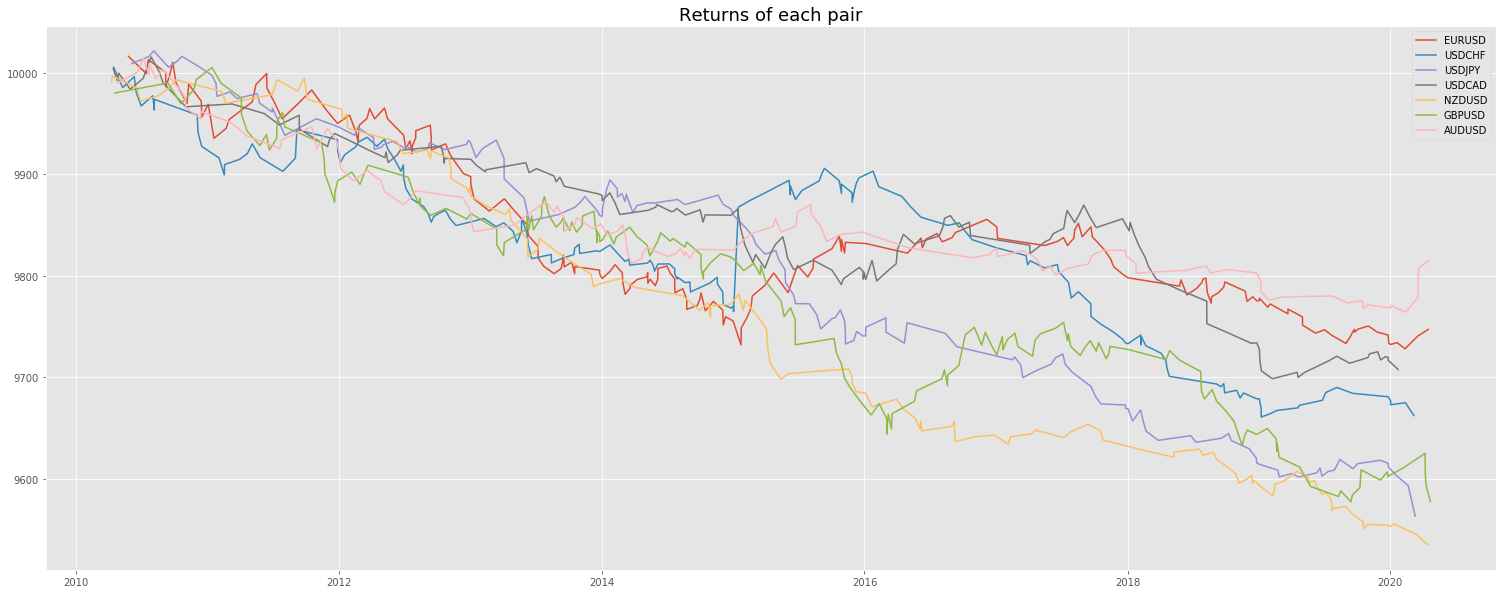

In [13]:
plt.figure(figsize = (26, 10))
for pair in range(len(pairs_list)):
    plt.plot(pairs_results[pair]['cum_res'], label = pairs_list[pair])
plt.legend()
plt.title('Returns of each pair', fontsize = 18)

***** STRATEGY PERFORMANCE *****
--------------------------------
Number of trades: 1104
Number of profits: 501
Number of losses: 599
Number of breakevens: 4 

Winning percentage 45.55 %
ROI: -2392.0
--------------------------------
Average profitable trade: 7.2
Average lossing trade: -10.02
Max profitable trade: 103.07
Max lossing trade: -30.15


Text(0.5, 1.0, 'return of strategy')

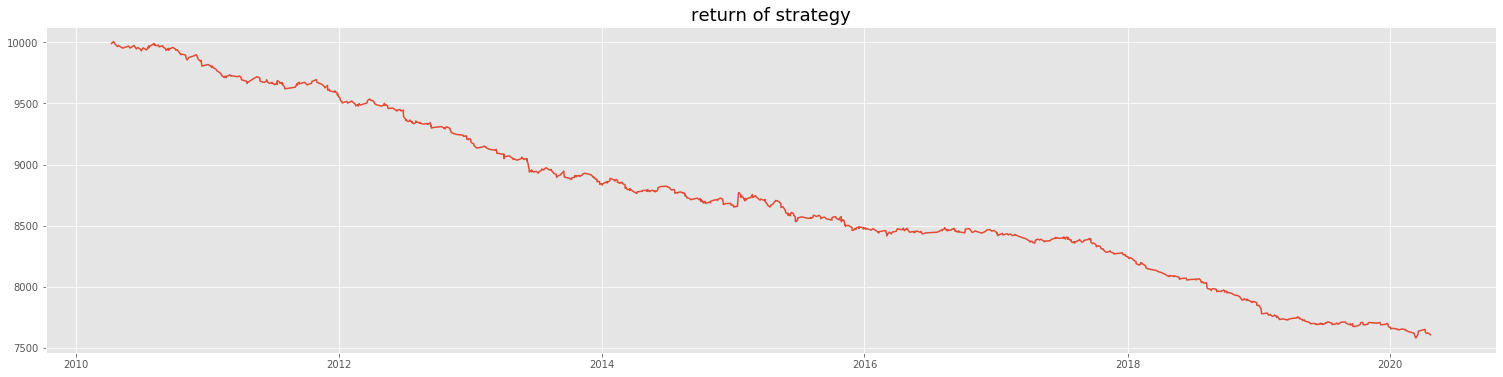

In [31]:
#Strategy performance
print('***** STRATEGY PERFORMANCE *****')
print('--------------------------------')
print('Number of trades:', len(str_profits + str_losses + str_be))
print('Number of profits:', len(str_profits))
print('Number of losses:', len(str_losses))
print('Number of breakevens:', len(str_be), '\n')
print('Winning percentage', (round(len(str_profits) / (len(str_profits) + len(str_losses)) * 100, 2)), '%')
print('ROI:', round(strategy_results['cum_res'][-1]) - account_size)
print('--------------------------------')
print('Average profitable trade:', round(sum(str_profits) / len(str_profits), 2))
print('Average lossing trade:', round(sum(str_losses) / len(str_losses), 2))
print('Max profitable trade:', round(max(str_profits), 2))
print('Max lossing trade:', round(min(str_losses), 2))

plt.figure(figsize = (26, 6))
plt.plot(strategy_results['cum_res'])
plt.title('return of strategy', fontsize = 18)